In [ ]:
from torchvision.datasets import FashionMNIST
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import cv2

from sklearn.cluster import MiniBatchKMeans
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
import tensorflow as tf

# Check if GPU is available
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

# Explicitly enable GPU (Colab usually does this by default)
tf.device('/GPU:0')

GPU is available


In [ ]:
# Transform to resize and convert to tensor
transform = transforms.Compose([
    transforms.ToTensor()
])

In [ ]:
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
import numpy as np

# Transform pipeline (now with RGB-to-grayscale)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Grayscale(),  # Convert RGB to grayscale
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1,1] range
])
# Load CIFAR-10
dataset = CIFAR10(root='./data', train=True, download=True, transform=transform)
data_loader = DataLoader(dataset, batch_size=1, shuffle=False)

# Extract grayscale images and labels
images = []
labels = []
for i, (img, label) in enumerate(data_loader):
    # if i >= 20000:  # Using first 20,000 samples (adjust as needed)
    #     break
    # Remove normalization and scale to [0,255]
    gray = ((img[0].numpy().squeeze() * 0.5 + 0.5) * 255).astype(np.uint8)
    images.append(gray)
    labels.append(label.item())

# Convert to numpy arrays
images = np.array(images)  # Shape: (20000, 32, 32)
labels = np.array(labels)

# Add channel dimension for Keras (20000, 32, 32, 1)
images = np.expand_dims(images, axis=-1)

100%|██████████| 170M/170M [00:13<00:00, 12.6MB/s]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
# # Calculate class distribution
# class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
#                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# label_counts = Counter(labels)

# # Plotting
# plt.figure(figsize=(10, 5))
# bars = plt.bar(class_names, [label_counts[i] for i in range(10)], color='teal')
# plt.xticks(rotation=45, ha='right')
# plt.title(f'Class Distribution')
# plt.grid(axis='y', linestyle='--', alpha=0.7)

In [ ]:
# images = np.stack(images).squeeze()  # (n,28,28)
# images = images[..., np.newaxis]  # (n,28,28,1)
# images = images.astype('float32') / 255.0  # Normalize to [0,1]
# labels = np.array(labels)


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, Dense

In [ ]:
# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.25, stratify=labels, random_state=42)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.20, stratify=y_train, random_state=42)


Training 1-layer model...


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (256, 32, 32, 32)      │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (256, 32, 32, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (256, 16, 16, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (256, 16, 16, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (256, 8192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (256, 512)             │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_44          │ (256, 512)             │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (256, 512)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (256, 128)             │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_45          │ (256, 128)             │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (256, 128)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (256, 10)              │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,264,778 (16.27 MB)

 Trainable params: 4,263,434 (16.26 MB)

 Non-trainable params: 1,344 (5.25 KB)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step - accuracy: 0.2560 - loss: 2.5089 - val_accuracy: 0.4081 - val_loss: 1.9057
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4181 - loss: 1.7159 - val_accuracy: 0.5237 - val_loss: 1.3996
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4897 - loss: 1.4611 - val_accuracy: 0.5400 - val_loss: 1.3234
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5444 - loss: 1.3000 - val_accuracy: 0.4895 - val_loss: 1.4408
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5871 - loss: 1.1820 - val_accuracy: 0.5615 - val_loss: 1.2667
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6193 - loss: 1.0946 - val_accuracy: 0.5600 - val_loss: 1.2857
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6393 - loss: 1.0163 - val_accuracy: 0.5928 - val_loss: 1.2008
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6619 - loss: 0.9629 - val_accuracy: 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (256, 32, 32, 32)      │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (256, 32, 32, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (256, 16, 16, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (256, 16, 16, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (256, 16, 16, 64)      │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (256, 16, 16, 64)      │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (256, 8, 8, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (256, 8, 8, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (256, 4096)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (256, 512)             │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_46          │ (256, 512)             │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (256, 512)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (256, 128)             │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_47          │ (256, 128)             │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (256, 128)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (256, 10)              │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,186,378 (8.34 MB)

 Trainable params: 2,184,906 (8.33 MB)

 Non-trainable params: 1,472 (5.75 KB)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 17s 70ms/step - accuracy: 0.2449 - loss: 2.5627 - val_accuracy: 0.4143 - val_loss: 1.6987
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.4126 - loss: 1.6984 - val_accuracy: 0.5024 - val_loss: 1.4564
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4908 - loss: 1.4422 - val_accuracy: 0.5404 - val_loss: 1.2949
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5500 - loss: 1.2791 - val_accuracy: 0.5252 - val_loss: 1.4311
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5819 - loss: 1.1953 - val_accuracy: 0.6044 - val_loss: 1.1214
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6137 - loss: 1.1197 - val_accuracy: 0.6085 - val_loss: 1.1262
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6291 - loss: 1.0617 - val_accuracy: 0.5735 - val_loss: 1.2960
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6457 - loss: 1.0015 - val_acc

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (256, 32, 32, 32)      │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (256, 32, 32, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (256, 32, 32, 64)      │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (256, 32, 32, 64)      │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (256, 16, 16, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (256, 16, 16, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (256, 16, 16, 128)     │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (256, 16, 16, 128)     │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (256, 8, 8, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (256, 8, 8, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (256, 8192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (256, 512)             │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_48          │ (256, 512)             │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (256, 512)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (256, 128)             │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_49          │ (256, 128)             │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (256, 128)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (256, 10)              │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,357,898 (16.62 MB)

 Trainable params: 4,356,170 (16.62 MB)

 Non-trainable params: 1,728 (6.75 KB)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - accuracy: 0.2591 - loss: 2.5727 - val_accuracy: 0.2011 - val_loss: 2.5076
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.4595 - loss: 1.5746 - val_accuracy: 0.4045 - val_loss: 1.7264
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.5672 - loss: 1.2276 - val_accuracy: 0.6149 - val_loss: 1.1040
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.6295 - loss: 1.0561 - val_accuracy: 0.6597 - val_loss: 0.9924
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.6688 - loss: 0.9443 - val_accuracy: 0.6500 - val_loss: 1.0050
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.6982 - loss: 0.8706 - val_accuracy: 0.6467 - val_loss: 1.0619
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.7194 - loss: 0.8051 - val_accuracy: 0.7041 - val_loss: 0.8570
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.7429 - loss: 0.7395 - val_acc

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (256, 32, 32, 32)      │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (256, 32, 32, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (256, 32, 32, 64)      │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (256, 32, 32, 64)      │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (256, 16, 16, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (256, 16, 16, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (256, 16, 16, 128)     │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (256, 16, 16, 128)     │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (256, 16, 16, 256)     │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (256, 16, 16, 256)     │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (256, 8, 8, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (256, 8, 8, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (256, 16384)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (256, 512)             │     8,389,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_50          │ (256, 512)             │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (256, 512)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (256, 128)             │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_51          │ (256, 128)             │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (256, 128)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (256, 10)              │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,848,394 (33.75 MB)

 Trainable params: 8,846,154 (33.75 MB)

 Non-trainable params: 2,240 (8.75 KB)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 27s 127ms/step - accuracy: 0.2620 - loss: 2.4685 - val_accuracy: 0.2541 - val_loss: 2.1742
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.5051 - loss: 1.4502 - val_accuracy: 0.5673 - val_loss: 1.2763
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.5995 - loss: 1.1425 - val_accuracy: 0.6696 - val_loss: 0.9517
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.6682 - loss: 0.9557 - val_accuracy: 0.7017 - val_loss: 0.8720
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - accuracy: 0.7066 - loss: 0.8488 - val_accuracy: 0.7011 - val_loss: 0.8688
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.7411 - loss: 0.7563 - val_accuracy: 0.7103 - val_loss: 0.8311
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.7706 - loss: 0.6732 - val_accuracy: 0.6784 - val_loss: 0.9888
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.7901 - loss: 0.5985 - val

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_31 (Conv2D)              │ (256, 32, 32, 32)      │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (256, 32, 32, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (256, 32, 32, 64)      │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (256, 32, 32, 64)      │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (256, 16, 16, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (256, 16, 16, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (256, 16, 16, 128)     │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (256, 16, 16, 128)     │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (256, 16, 16, 256)     │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (256, 16, 16, 256)     │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (256, 8, 8, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (256, 8, 8, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (256, 8, 8, 512)       │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (256, 8, 8, 512)       │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (256, 4, 4, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (256, 4, 4, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (256, 8192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (256, 512)             │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_52          │ (256, 512)             │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (256, 512)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (256, 128)             │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_53          │ (256, 128)             │           51

 Total params: 5,836,298 (22.26 MB)

 Trainable params: 5,833,034 (22.25 MB)

 Non-trainable params: 3,264 (12.75 KB)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 33s 148ms/step - accuracy: 0.2394 - loss: 2.5127 - val_accuracy: 0.2859 - val_loss: 2.1653
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 21s 71ms/step - accuracy: 0.4552 - loss: 1.6064 - val_accuracy: 0.4848 - val_loss: 1.4089
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step - accuracy: 0.5853 - loss: 1.1849 - val_accuracy: 0.5036 - val_loss: 1.5511
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 9s 73ms/step - accuracy: 0.6674 - loss: 0.9703 - val_accuracy: 0.6952 - val_loss: 0.8845
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - accuracy: 0.7037 - loss: 0.8542 - val_accuracy: 0.6891 - val_loss: 0.9166
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - accuracy: 0.7360 - loss: 0.7608 - val_accuracy: 0.7443 - val_loss: 0.7436
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.7680 - loss: 0.6805 - val_accuracy: 0.7299 - val_loss: 0.7934
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.7932 - loss: 0.6005 - val

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)              │ (256, 32, 32, 32)      │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (256, 32, 32, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (256, 32, 32, 64)      │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (256, 32, 32, 64)      │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (256, 16, 16, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (256, 16, 16, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (256, 16, 16, 128)     │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (256, 16, 16, 128)     │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (256, 16, 16, 256)     │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (256, 16, 16, 256)     │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (256, 8, 8, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (256, 8, 8, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (256, 8, 8, 512)       │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (256, 8, 8, 512)       │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (256, 8, 8, 512)       │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (256, 8, 8, 512)       │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (256, 4, 4, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (256, 4, 4, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (256, 8192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (256, 512)             │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_54          │ (256, 512)             │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 8,198,154 (31.27 MB)

 Trainable params: 8,193,866 (31.26 MB)

 Non-trainable params: 4,288 (16.75 KB)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 42s 210ms/step - accuracy: 0.2447 - loss: 2.5402 - val_accuracy: 0.1213 - val_loss: 4.5056
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 18s 111ms/step - accuracy: 0.4506 - loss: 1.6100 - val_accuracy: 0.4105 - val_loss: 1.7883
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 109ms/step - accuracy: 0.5673 - loss: 1.2627 - val_accuracy: 0.5781 - val_loss: 1.2308
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 108ms/step - accuracy: 0.6454 - loss: 1.0077 - val_accuracy: 0.6319 - val_loss: 1.1405
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 21s 110ms/step - accuracy: 0.7120 - loss: 0.8409 - val_accuracy: 0.7091 - val_loss: 0.8420
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 13s 111ms/step - accuracy: 0.7488 - loss: 0.7149 - val_accuracy: 0.7241 - val_loss: 0.8417
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 13s 110ms/step - accuracy: 0.7880 - loss: 0.6195 - val_accuracy: 0.7219 - val_loss: 0.8575
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 107ms/step - accuracy: 0.8193 - loss: 0

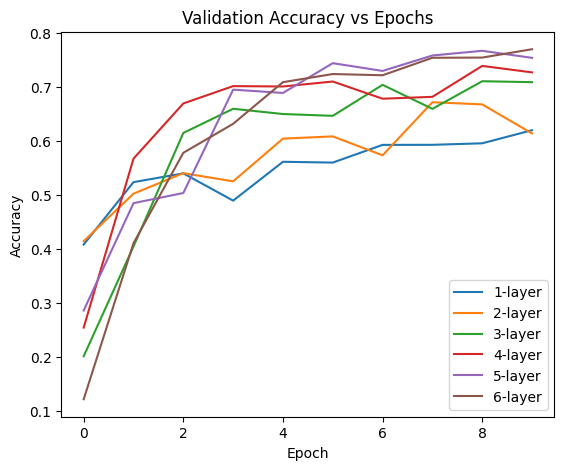

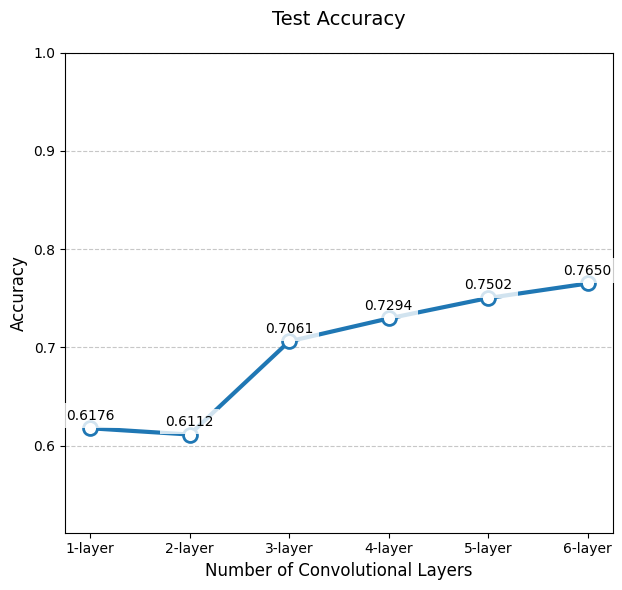

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, Dense


models = {
    '1-layer': [
        Conv2D(32, 3, padding='same', activation='relu'),
        BatchNormalization(),
        MaxPool2D(2),
        Dropout(0.25),
        Flatten()
    ],
    # '2-layer-V1': [
    #     Conv2D(32, 3, padding='same', activation='relu'),
    #     BatchNormalization(),
    #     Conv2D(64, 3, padding='same', activation='relu'),
    #     BatchNormalization(),
    #     MaxPool2D(2),
    #     Dropout(0.25),
    #     Flatten()
    # ],
    '2-layer': [
        Conv2D(32, 3, padding='same', activation='relu'),
        BatchNormalization(),
        MaxPool2D(2),
        Dropout(0.25),
        Conv2D(64, 3, padding='same', activation='relu'),
        BatchNormalization(),
        MaxPool2D(2),
        Dropout(0.25),
        Flatten()
    ],
    '3-layer': [
        Conv2D(32, 3, padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(64, 3, padding='same', activation='relu'),
        BatchNormalization(),
        MaxPool2D(2),
        Dropout(0.25),
        Conv2D(128, 3, padding='same', activation='relu'),
        BatchNormalization(),
        MaxPool2D(2),
        Dropout(0.25),
        Flatten()
    ],
    '4-layer': [
        Conv2D(32, 3, padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(64, 3, padding='same', activation='relu'),
        BatchNormalization(),
        MaxPool2D(2),
        Dropout(0.25),
        Conv2D(128, 3, padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(256, 3, padding='same', activation='relu'),
        BatchNormalization(),
        MaxPool2D(2),
        Dropout(0.25),
        Flatten()
    ],
    '5-layer': [
        Conv2D(32, 3, padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(64, 3, padding='same', activation='relu'),
        BatchNormalization(),
        MaxPool2D(2),
        Dropout(0.25),
        Conv2D(128, 3, padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(256, 3, padding='same', activation='relu'),
        BatchNormalization(),
        MaxPool2D(2),
        Dropout(0.25),
        Conv2D(512, 3, padding='same', activation='relu'),
        BatchNormalization(),
        MaxPool2D(2),
        Dropout(0.25),
        Flatten()
    ],
    '6-layer': [
        Conv2D(32, 3, padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(64, 3, padding='same', activation='relu'),
        BatchNormalization(),
        MaxPool2D(2),
        Dropout(0.25),
        Conv2D(128, 3, padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(256, 3, padding='same', activation='relu'),
        BatchNormalization(),
        MaxPool2D(2),
        Dropout(0.25),
        Conv2D(512, 3, padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(512, 3, padding='same', activation='relu'),
        BatchNormalization(),
        MaxPool2D(2),
        Dropout(0.25),
        Flatten()
    ]
}

# Training and evaluation
histories = {}
test_accuracies = {}

for name, layers in models.items():
    print(f"\nTraining {name} model...")
    model = Sequential(layers)

    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))


    model.build(input_shape=(256, 32, 32, 1))
    model.summary()  # Prints nicely

    model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])



    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=10,
        batch_size=256,
        verbose=1
    )

    # Store history
    histories[name] = history

    # Evaluate on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    test_accuracies[name] = test_acc
    print(f"{name} test accuracy: {test_acc:.4f}")

# Plotting
plt.figure(figsize=(14, 5))

# Epochs vs Validation Accuracy
plt.subplot(1, 2, 1)
for name, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=name)

plt.title('Validation Accuracy vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.figure(figsize=(12, 6))

# Line plot with markers
plt.subplot(1, 2, 2)
plt.plot(list(test_accuracies.keys()),
         list(test_accuracies.values()),
         'o-',
         color='#1f77b4',
         markersize=10,
         linewidth=3,
         markerfacecolor='white',
         markeredgewidth=2)

# Enhanced formatting
plt.ylim(min(test_accuracies.values()) - 0.1,  # Auto-adjust y-limits
        1)
plt.xticks(list(test_accuracies.keys()))  # Explicit x-ticks
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Value annotations
for model, acc in test_accuracies.items():
    plt.text(model, acc + 0.02, f'{acc:.4f}',
             ha='center', va='top',
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

plt.title('Test Accuracy', pad=20, fontsize=14)
plt.xlabel('Number of Convolutional Layers', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)


# # Label bars
# for i, v in enumerate(test_accuracies):
#     plt.text(i, v + 0.0005, f"{v:.4f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, Dense

def build_6layer_cnn():
    model = Sequential([
        Conv2D(32, 3, padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(64, 3, padding='same', activation='relu'),
        BatchNormalization(),
        MaxPool2D(2),
        Dropout(0.25),
        Conv2D(128, 3, padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(256, 3, padding='same', activation='relu'),
        BatchNormalization(),
        MaxPool2D(2),
        Dropout(0.25),
        Conv2D(512, 3, padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(512, 3, padding='same', activation='relu'),
        BatchNormalization(),
        MaxPool2D(2),
        Dropout(0.25),


        # Classifier
        Flatten(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

    return model

In [ ]:
batch_sizes = [32, 64, 128, 256, 512]
test_accuracies = {}

for bs in batch_sizes:
    # Re-initialize model to reset weights
    model = build_6layer_cnn()  # Your existing 3-layer function
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'] )
    # Train with current batch size
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        batch_size=bs,
        epochs=15,
        verbose=1
    )

    # Evaluate
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    test_accuracies[bs] = test_acc
    print(f"Batch size {bs}: Test accuracy = {test_acc:.4f}")

Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.2538 - loss: 2.3936 - val_accuracy: 0.3040 - val_loss: 2.3813
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 58s 23ms/step - accuracy: 0.5393 - loss: 1.3120 - val_accuracy: 0.5559 - val_loss: 1.3153
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.6519 - loss: 1.0072 - val_accuracy: 0.5257 - val_loss: 1.4209
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.6994 - loss: 0.8865 - val_accuracy: 0.7056 - val_loss: 0.8580
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.7529 - loss: 0.7388 - val_accuracy: 0.7295 - val_loss: 0.7756
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.7751 - loss: 0.6784 - val_accuracy: 0.7317 - val_loss: 0.7835
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.8077 - loss: 0.5737 - val_accuracy: 0.7736 - val_loss: 0.6769
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.8358 - loss: 0.4895 - 